# Analytical Programming Project 

# Team 14 - Vinay Karthick Jeyabalakrishnan & Pranav Mehta 

### The purpose 
Gaming industry is bigger than the music industry and cinema industry combined. The data set collects data of various games released between 1980 to 2016 along with their respective genre, publisher , sales, scores and more. The main purpose is to analyse the sales trends dependent on the other variables mentioned. The sales metrics are divided into 4 major markets, hence the dependency can be analysed on respective markets. This help developers to get an idea to target the right product to the target audience. 

### Why this question is important? 

Gaming industry is spread globally and providing the right audience with a suitable product is  key to maximise revenue. This analysis will be more specific in that direction helping decision makers and consumers to be further involved in the process. 
Advertising the product plays a major role in the gaming industry. This analysis will help the publishers to advertise and run pilot projects on the right target audience. These pilot projects will help companies to develop products that are more suitable which will end up in higher sales.


### Dataset Source

https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

### Description of the dataset including the list of fields 
The data set has 16 columns or variables and 16,719 observations. However the data has to be cleaned for missing values of certain products for balanced computation. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

In [2]:
import pandas as pd
df_sales=pd.read_csv('/Users/palaniappansubramaniam/Desktop/SEM 1/Analytical Programming/Project/Video_Games_Sales_as_at_22_Dec_2016.csv')
df_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_sales.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### Basic descriptive features of the data

### The number of observations

In [4]:
df_sales.shape

(16719, 16)

### Field names

In [5]:
df_sales.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

Name               - Name of the game     	
Platform           - Console on which the game is running	
Year_of_Release	   - Year of the game released
Genre	           - Game's category
Publisher	       - Publisher
NA_Sales	       - Game sales in North America (in millions of units)
EU_Sales	       - Game sales in the European Union (in millions of units)
JP_Sales           - Game sales in Japan (in millions of units)
Other_Sales	       - Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and USA
Global_Sales       - Total sales in the world (in millions of units)
Critic_Score	   - Aggregate score compiled by Metacritic staff
Critic_Count	   - The number of critics used in coming up with the Critic_score
User_Score	       - Score by Metacritic's subscribers
User_Count	       - Number of users who gave the user_score
Developer	       - Party responsible for creating the game
Rating             - The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)

In [6]:
df_sales.values

array([['Wii Sports', 'Wii', 2006.0, ..., 322.0, 'Nintendo', 'E'],
       ['Super Mario Bros.', 'NES', 1985.0, ..., nan, nan, nan],
       ['Mario Kart Wii', 'Wii', 2008.0, ..., 709.0, 'Nintendo', 'E'],
       ...,
       ['Haitaka no Psychedelica', 'PSV', 2016.0, ..., nan, nan, nan],
       ['Spirits & Spells', 'GBA', 2003.0, ..., nan, nan, nan],
       ['Winning Post 8 2016', 'PSV', 2016.0, ..., nan, nan, nan]],
      dtype=object)

### Type of fields 

In [7]:
df_sales.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### The number of missing values by a field

In [9]:
df_sales.isnull().sum(axis=0)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Plan 

### Plan for more in-depth analysis

The data provides information on variables that helps us to derive inferences determining right target audience and product sales forecast. The corelation between the rating and sales can computed to understand the impact of ratings. 

Based on the region wise sales data, the most popular genres of that respective regions can be inferred thus giving an additional insight to the decision makers. 

A single product (game) is launched in multiple platforms (X360, PS4, etc.). The sales report on this will provide developers information about the consumer preference and the market segmentation of various gaming consoles thus targeting better. 

The user data and user score can be averaged to find the optimum score which can give an insight on the gaming experience and product reach. 


### Description of the analysis you plan to conduct to a non-technical business audience  

Sales report analysis to understand product performance 
Region wise sales report analysis to undestand global sales trends  
Crictic and user score analysis to understand user preference and feedback
Platform analysis to understand market segmentation and demand 

### Anticipated result of the analysis 

Clear insights for decision makers for future game developments 
Precise target audience to market the suitable product
Run pilot projects and promotions as per demand 
Focus on low sales areas and enhance product 
Critic and user feedback analysis 
Genre wise understanding of all above inferences

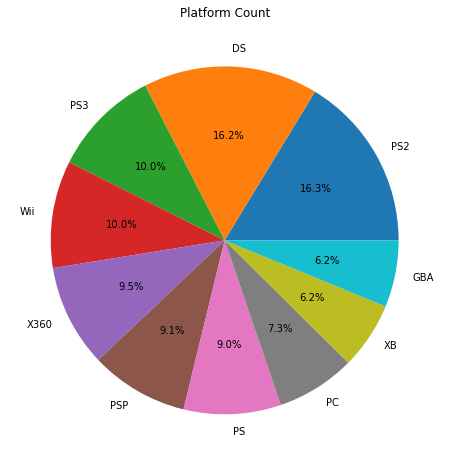

In [10]:
df_platform=df_sales['Platform'].value_counts()
keys= df_platform.keys()
value = df_platform.values
df_platform = pd.DataFrame({"Platform": keys,"Count": value})
df_platform=df_platform[df_platform["Count"]>800]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(df_platform['Count'],labels=df_platform['Platform'],autopct='%2.1f%%')
plt.title("Platform Count")
plt.show()

### Platform Distribuiton of Games.

It is PS2, PS3, DS, Wii, X360 are the major Platforms in the gaming industry. Sony, Nintendo and Microsoft holding 2/3 of the market share. This analysis will revolve around them to understand the industry metrics. 

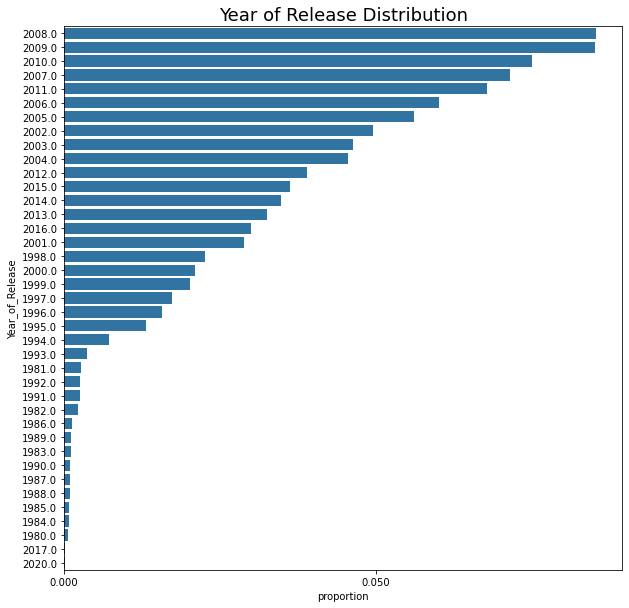

In [11]:
# Plot year_of_release dist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
year_counts = df_sales.Year_of_Release.value_counts()
year_order = year_counts.index
max_year_count = year_counts[year_counts.idxmax()]
max_year_prop = max_year_count/df_sales.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_year_prop, 0.05)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

plt.figure(figsize=(10,10))
sb.countplot(data = df_sales, y = 'Year_of_Release', color = base_color, order = year_order)
plt.xticks(tick_props * df_sales.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Year of Release Distribution', fontsize= 18);

### Highest game release by companies

Coincidentally more number of games were released during thr great resession of 2008. Industries would have suffered a loss, however this project will analyse what happens around that period. 

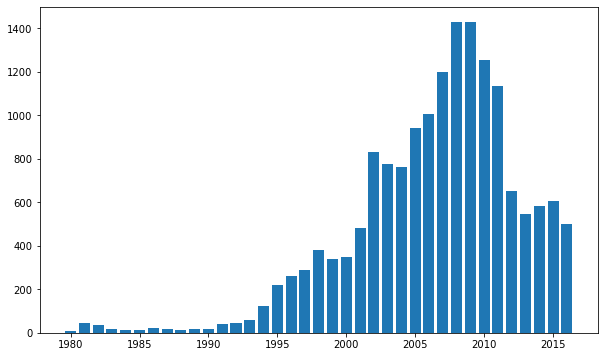

In [12]:
df_re=df_sales[df_sales["Year_of_Release"]<2017]
df_rel=df_re.groupby(["Year_of_Release"]).count()
df_rel["year"]=list(df_rel.index.astype(int))
plt.figure(figsize=(10,6))
plt.bar(df_rel["year"],df_rel["Name"])
plt.show()

### Game release over years

The gaming industry raising in the early 90s and a tremendous year on year growth is seen which peaks in 2008 and 2009. The sales falls after that. 

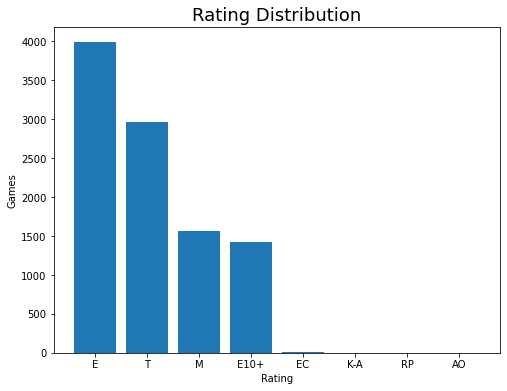

In [13]:
df_rating=df_sales['Rating'].value_counts()
keys= df_rating.keys()
value = df_rating.values
df_rating = pd.DataFrame({"Games": keys,"Rating": value})
plt.figure(figsize=(8,6))
plt.bar(df_rating["Games"],df_rating["Rating"])
plt.title('Rating Distribution',fontsize=18)
plt.xlabel('Rating')
plt.ylabel('Games')
plt.show()

### Ratings of Companies

E - Everyone ; E10+ - Everyone above 10 ; T - Teen ; M - Mature17+ ; RP - Rating Pending ; EC - Early Childhood ; K-A - Kids to adults 
E10+ is a unique observation where games are designed for very specific audience between childhood and teen which has equal number of games to matured category. 

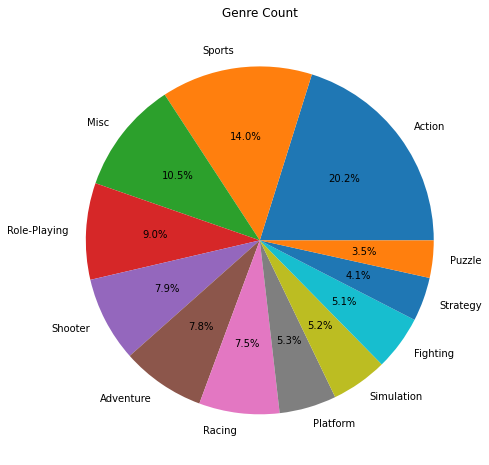

In [14]:
df1=df_sales['Genre'].value_counts()
keys= df1.keys()
value = df1.values
df2 = pd.DataFrame({"Genre": keys,"Count": value})
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(df2['Count'],labels=df2['Genre'],autopct='%2.1f%%')
plt.title("Genre Count")
plt.show()

### Genre Distribution 

The genres are distributed over 17 types with major ones namely action, sports, role-playing, shooter, adventure and Racing. The project will analyse on the three top categories Action, Sports and Role-Play. 

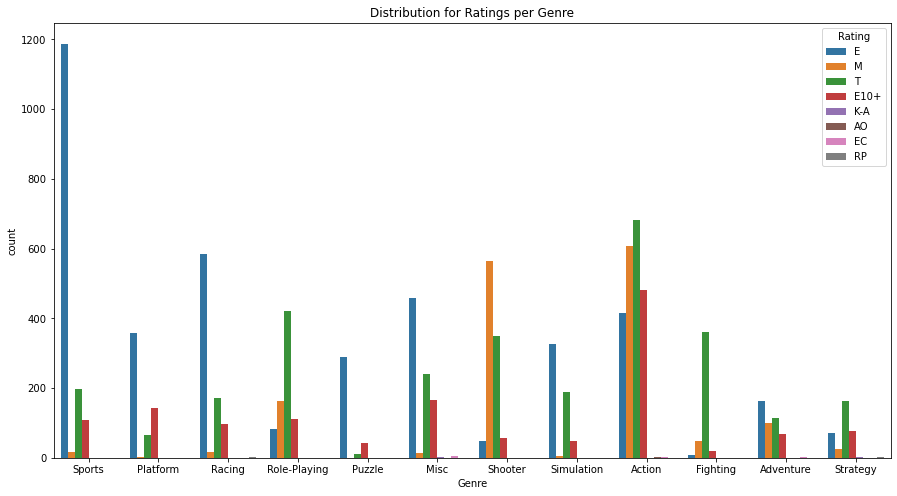

In [15]:
plt.figure(figsize=(15,8))
sb.countplot(data=df_sales, x='Genre', hue='Rating');
plt.title('Distribution for Ratings per Genre');


### Rating Distribution among Genres

Genres such as sports, racing, puzzle and simulation are designed for everyone. Action, Fighting, Adventure and strategy are targeted to teens. Action is targeted for all categories of users. 

In [16]:
df_NAsales=df_sales.groupby(['Genre'])['NA_Sales'].sum()
keys= df_NAsales.keys()
value = df_NAsales.values
df_NAsales = pd.DataFrame({"Genre": keys,"Count": value})


In [17]:
df_EUsales=df_sales.groupby(['Genre'])['EU_Sales'].sum()
keys= df_EUsales.keys()
value = df_EUsales.values
df_EUsales = pd.DataFrame({"Genre": keys,"Count": value})


In [18]:
df_JPsales=df_sales.groupby(['Genre'])['JP_Sales'].sum()
keys= df_JPsales.keys()
value = df_JPsales.values
df_JPsales = pd.DataFrame({"Genre": keys,"Count": value})


In [19]:
df_Othersales=df_sales.groupby(['Genre'])['Other_Sales'].sum()
keys= df_Othersales.keys()
value = df_Othersales.values
df_Othersales = pd.DataFrame({"Genre": keys,"Count": value})



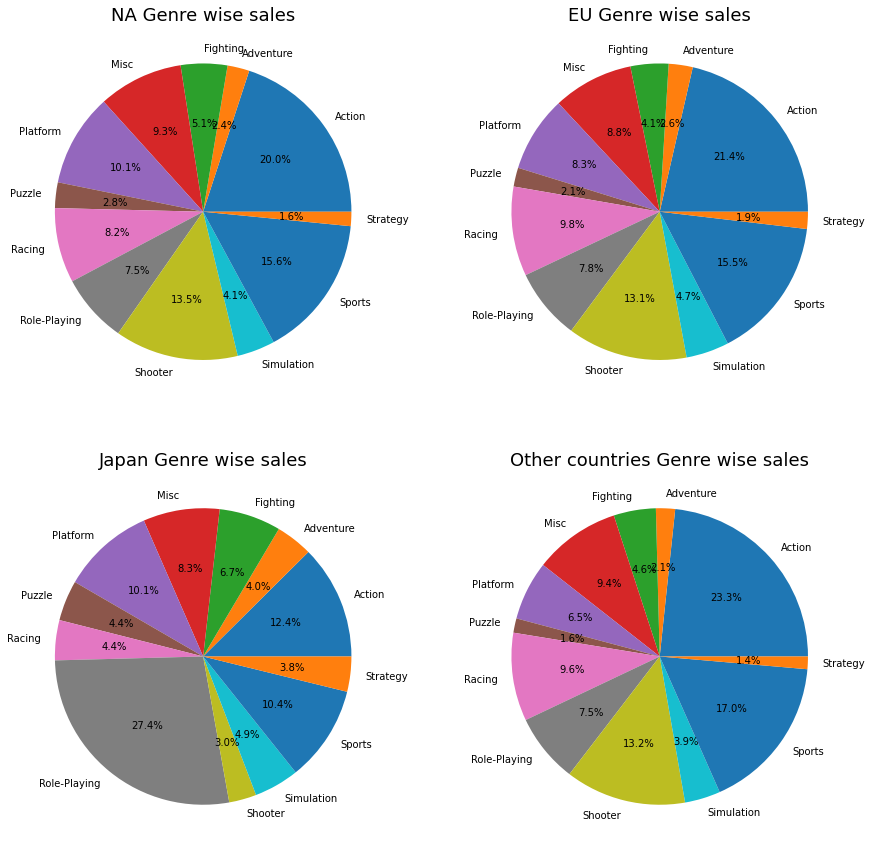

In [20]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
#fig.figure(figsize=(8,8))
axs[0,0].pie(df_NAsales['Count'],labels=df_NAsales['Genre'],autopct='%2.1f%%')
axs[0,0].set_title("NA Genre wise sales",fontsize=18)
axs[0,1].pie(df_EUsales['Count'],labels=df_EUsales['Genre'],autopct='%2.1f%%')
axs[0,1].set_title("EU Genre wise sales",fontsize=18)
axs[1,0].pie(df_JPsales['Count'],labels=df_JPsales['Genre'],autopct='%2.1f%%')
axs[1,0].set_title("Japan Genre wise sales",fontsize=18)
axs[1,1].pie(df_Othersales['Count'],labels=df_Othersales['Genre'],autopct='%2.1f%%')
axs[1,1].set_title("Other countries Genre wise sales",fontsize=18)
plt.show()

### Genre Distribution of Games

4 pie charts show the Genre distribution of games across the world helping to understand the target audience in each respective segment. Action and sports are dominant in the US, Europe and Other countries, however the Role playing is the most sorted genre in Japan follwed by the action and sports. US Europe and Other countries follow a similar distribution, whereas Japan stands out in its own unique way. 

This chart of Japan helps us understand how unique the market segmentation is and how specific games of those genres can be targeted to that market. 

In [21]:
Sales_list=[df_sales['NA_Sales'].sum(),df_sales['EU_Sales'].sum(),df_sales['JP_Sales'].sum(),df_sales['Other_Sales'].sum()]
df8=pd.DataFrame(list(zip(Sales_list,['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])),columns=["Sales in dollar","Region"])
df8

,Sales in dollar,Region
0,4402.62,NA_Sales
1,2424.67,EU_Sales
2,1297.43,JP_Sales
3,791.34,Other_Sales


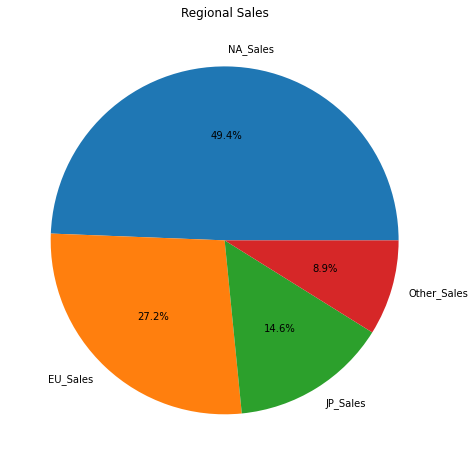

In [22]:
plt.figure(figsize=(8,8))
plt.pie(df8['Sales in dollar'],labels=df8['Region'],autopct='%2.1f%%')
plt.title("Regional Sales")
plt.show()

### Global Sales Analysis

US market dominating the industry with half of the market share followed by European Union. Japan, a single country contributes to 15% of the global sales. Rest of the world contributes to 10% of the sales. 

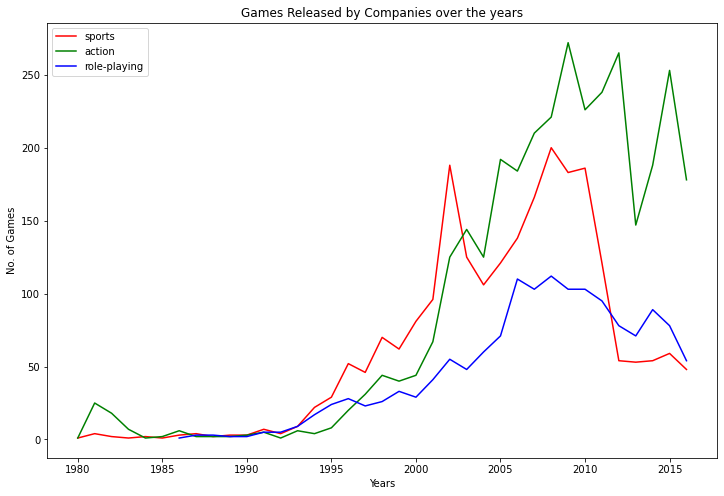

In [23]:
df5=df_sales[df_sales['Genre']=='Sports']
df5.sort_values(by=['Year_of_Release'])
df5_depart = df5[df5['Year_of_Release']<2017].groupby(['Year_of_Release']).count()
df4=df_sales[df_sales['Genre']=='Action']
df4.sort_values(by=['Year_of_Release'])
df4_depart = df4[df4['Year_of_Release']<2017].groupby(['Year_of_Release']).count()
df6=df_sales[df_sales['Genre']=='Role-Playing']
df6.sort_values(by=['Year_of_Release'])
df6_depart = df6[df6['Year_of_Release']<2017].groupby(['Year_of_Release']).count()
plt.figure(figsize=(12,8))
plt.plot(df5_depart['Name'],color='red', label='sports')
plt.plot(df4_depart['Name'],color='green', label='action')
plt.plot(df6_depart['Name'],color='blue', label='role-playing')
plt.title('Games Released by Companies over the years')
plt.xlabel('Years')
plt.ylabel('No. of Games')
plt.legend()
plt.show()

### Sale Comparison 

The three major categories sports, action and role-playing are analysed in this project. This chart shows the games released over the years by companies of the three major categories. Sports taking the first lead faces a fall, but action keeps growing and becomes the most sucessfull genre for companies. 

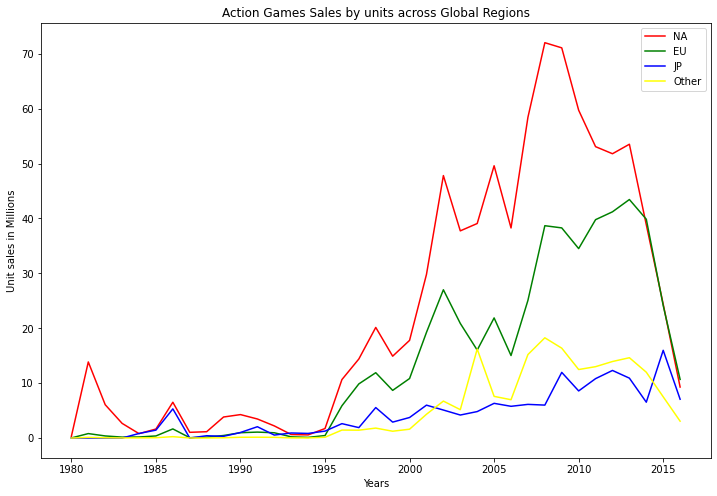

In [24]:
df5=df_sales[df_sales['Genre']=='Sports']
df5.sort_values(by=['Year_of_Release'])
df5_depart = df5[df5['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
df4=df_sales[df_sales['Genre']=='Action']
df4.sort_values(by=['Year_of_Release'])
df4_depart = df4[df4['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
df6=df_sales[df_sales['Genre']=='Role-Playing']
df6.sort_values(by=['Year_of_Release'])
df6_depart = df6[df6['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
plt.figure(figsize=(12,8))
plt.plot(df4_depart['NA_Sales'],color='red', label='NA')
plt.plot(df4_depart['EU_Sales'],color='green', label='EU')
plt.plot(df4_depart['JP_Sales'],color='blue', label='JP')
plt.plot(df4_depart['Other_Sales'],color='yellow', label='Other')
plt.title('Action Games Sales by units across Global Regions')
plt.xlabel('Years')
plt.ylabel('Unit sales in Millions')
plt.legend()
plt.show()


### Action Games sales data chart

North America leading the most in action followed by EU, Japan lags behind rest of the world where other genres are more prevalent.  

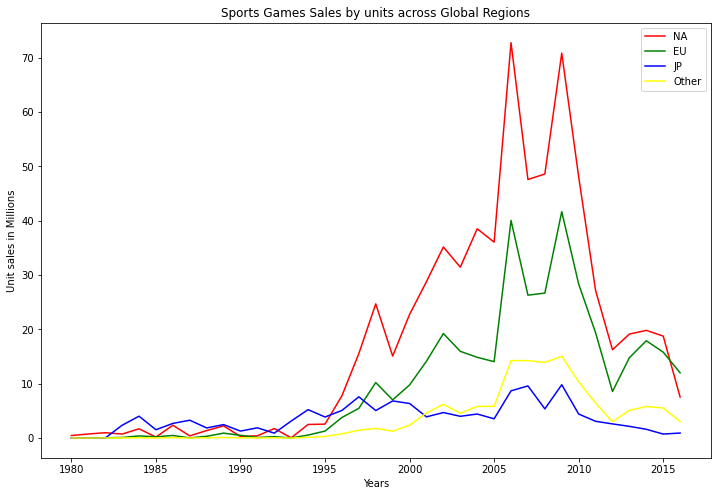

In [25]:
df5=df_sales[df_sales['Genre']=='Sports']
df5.sort_values(by=['Year_of_Release'])
df5_depart = df5[df5['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
df4=df_sales[df_sales['Genre']=='Action']
df4.sort_values(by=['Year_of_Release'])
df4_depart = df4[df4['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
df6=df_sales[df_sales['Genre']=='Role-Playing']
df6.sort_values(by=['Year_of_Release'])
df6_depart = df6[df6['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
plt.figure(figsize=(12,8))
plt.plot(df5_depart['NA_Sales'],color='red', label='NA')
plt.plot(df5_depart['EU_Sales'],color='green', label='EU')
plt.plot(df5_depart['JP_Sales'],color='blue', label='JP')
plt.plot(df5_depart['Other_Sales'],color='yellow', label='Other')
plt.title('Sports Games Sales by units across Global Regions')
plt.xlabel('Years')
plt.ylabel('Unit sales in Millions')
plt.legend()
plt.show()

### Sports Games sales data chart

America leading the chart again with EU following closely, the lines tell us how markets react very similar at times. The reason for the fall post 2012 is not known due to limitations, provided with more time our team will be happy to analyse the industry in depth. 

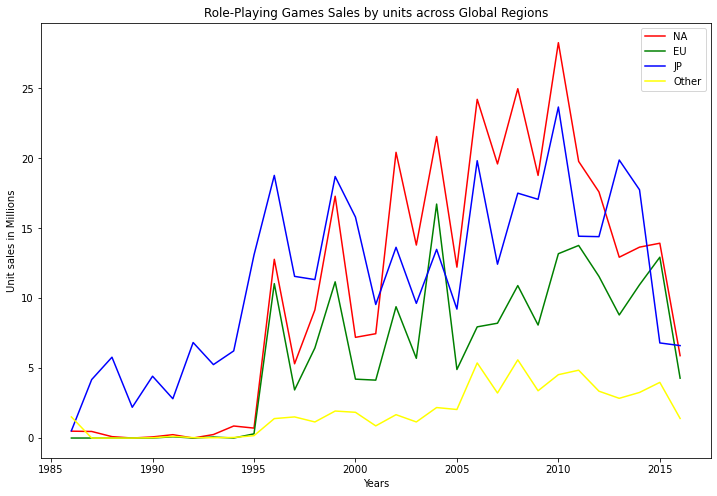

In [26]:
df5=df_sales[df_sales['Genre']=='Sports']
df5.sort_values(by=['Year_of_Release'])
df5_depart = df5[df5['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
df4=df_sales[df_sales['Genre']=='Action']
df4.sort_values(by=['Year_of_Release'])
df4_depart = df4[df4['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
df6=df_sales[df_sales['Genre']=='Role-Playing']
df6.sort_values(by=['Year_of_Release'])
df6_depart = df6[df6['Year_of_Release']<2017].groupby(['Year_of_Release']).sum()
plt.figure(figsize=(12,8))
plt.plot(df6_depart['NA_Sales'],color='red', label='NA')
plt.plot(df6_depart['EU_Sales'],color='green', label='EU')
plt.plot(df6_depart['JP_Sales'],color='blue', label='JP')
plt.plot(df6_depart['Other_Sales'],color='yellow', label='Other')
plt.title('Role-Playing Games Sales by units across Global Regions')
plt.xlabel('Years')
plt.ylabel('Unit sales in Millions')
plt.legend()
plt.show()

### Action Games sales data chart


A very close fight in the role playing genre in all markets. Japan leading the order from early 1990s gradually gets close with the American market. A short spike is observed in 2004 in Europe, however no much demand threafter. 

In [27]:
df_px=df_sales[df_sales['Platform'].isin(['X360',"PS3"])]
df_compare= df_px.groupby(["Name"]).count()
df_px1=df_compare[df_compare["Platform"]>1]

In [28]:
df_cgames = list(df_px1.index)
df_cgames1=df_px[df_px["Name"].isin(df_cgames)]
df_x360 = df_cgames1[df_cgames1["Platform"]=="X360"].groupby(["Year_of_Release"]).sum()
df_ps3 = df_cgames1[df_cgames1["Platform"]=="PS3"].groupby(["Year_of_Release"]).sum()

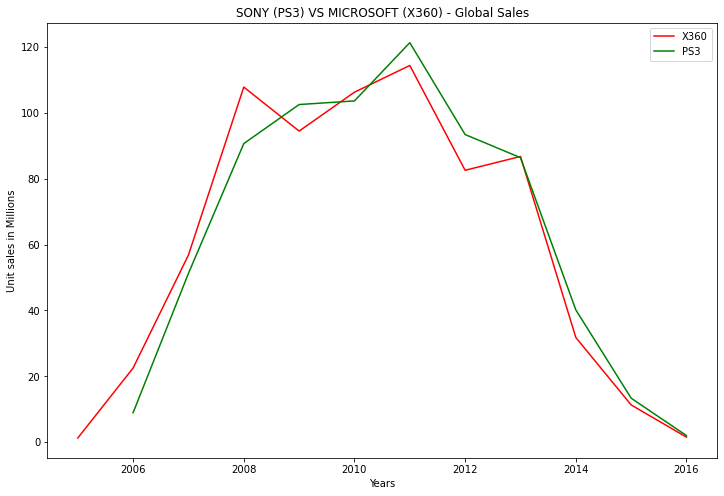

In [29]:
plt.figure(figsize=(12,8))
plt.plot(df_x360['Global_Sales'],color='red', label='X360')
plt.plot(df_ps3['Global_Sales'],color='green', label='PS3')
plt.title('SONY (PS3) VS MICROSOFT (X360) - Global Sales')
plt.xlabel('Years')
plt.ylabel('Unit sales in Millions')
plt.legend()
plt.show()

### The Big Battle

Sony and Microsoft have always competed in the gaming industry neck to neck with their own consoles. An important part of this project is to analyse these 2 companies, how they perform and compete with each other over the years. 

For this analyses, we took all the games that launched in both platforms PS3 and X360. Same game developed by a developer but released in multilpe platforms, PS3 and X360 for this case respectively. The total sales of all those games are calculted for each platform and a comparitive line chart is generated. 

The inference is surprising where two companies are in a very close neck to neck fight. Initially it's microsoft leading over a little margin, later Sony leads, however its a very thin gap in both cases. 



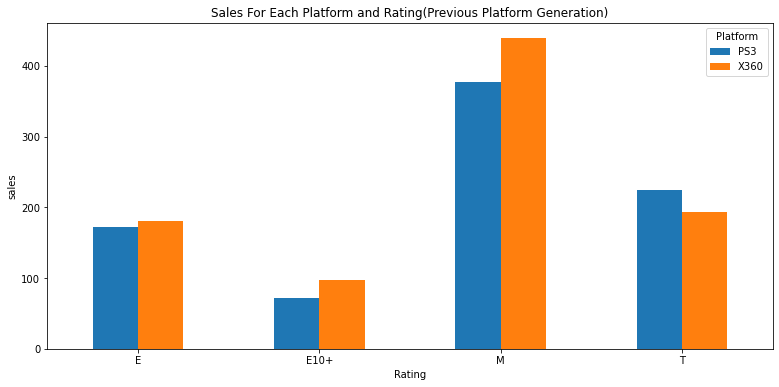

In [30]:
ratings_df = df_sales.query('Rating == "T" or Rating == "M" or Rating == "E" or Rating == "E10+"')
platform_df = ratings_df.query('Platform == "PS3" or Platform == "X360"')
rating_sales = platform_df.groupby(['Rating','Platform']).Global_Sales.sum()
rating_sales.unstack().plot(kind='bar', figsize=(13,6))
plt.title('Sales For Each Platform and Rating(Previous Platform Generation)')
plt.ylabel('sales');
plt.xticks(rotation = 0);

### Rating of Games developed by Sony and Microsoft

It is observed that Microsoft has more games than sony for E E10+ and M audience but Sony develops more games for teen audience. 

In [31]:
df_sales["Global_Sales"].corr(df_sales["Critic_Score"])

0.24547067750675444

In [32]:
df_sales["Critic_Score"]= df_sales["Critic_Score"]/10

In [33]:
df_scorr=df_sales.corr()

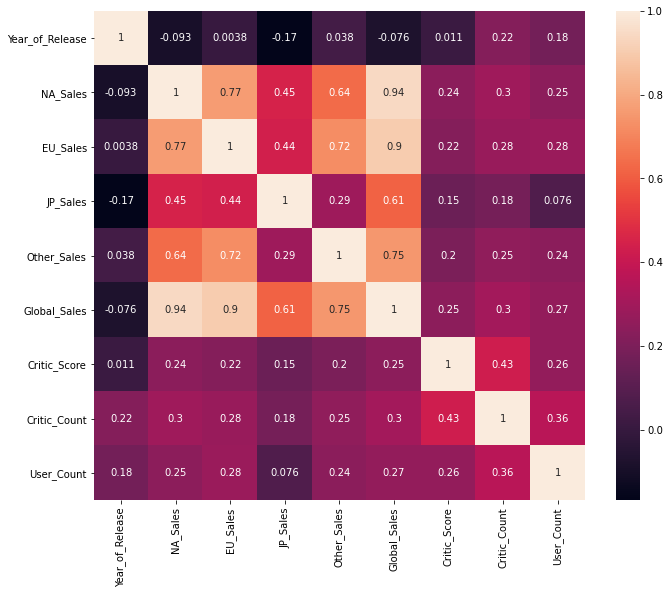

In [34]:
import seaborn as sns

plt.figure(figsize=(11,9))
sns.heatmap(df_scorr,annot=True)
plt.show()

### Correlation of the dataset

All quantative variables of the dataset is compared in the heatmap to understand the relation of each variable to the other. Highest relation when value is 1 and lowest at 0.1

The relation of critic score to sales, user score to sales are observed for analysis. No high impact or relation is observed. 

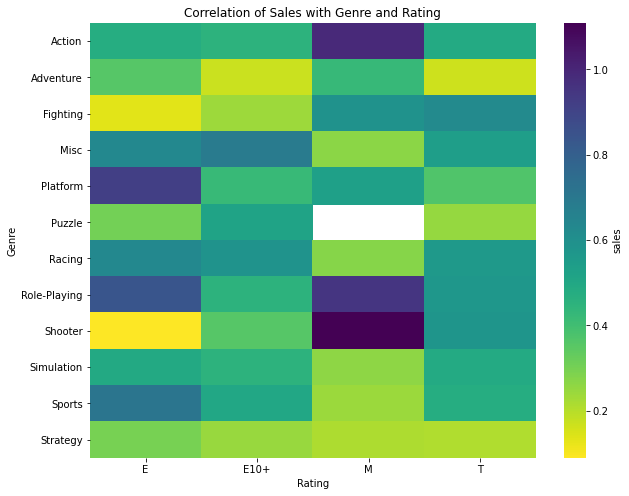

In [35]:
ratings_df = df_sales.query('Rating == "T" or Rating == "M" or Rating == "E" or Rating == "E10+"')
heatmap_data = pd.pivot_table(ratings_df, values='Global_Sales', index=['Genre'], columns='Rating')
plt.figure(figsize=(10,8))
plt.title('Correlation of Sales with Genre and Rating')
sb.heatmap(heatmap_data, cmap="viridis_r", cbar_kws={'label': 'sales'});

### Correlation between Rating and Genre 

Heatmap is generated over rating and sales to understand the relation between audience and preferred genre by those respective audience. 

Shoter, Role-Playing and Action games are mostly preferred by Mature audience. Fighting and racing preferred by Teens. Sports is sorted by eveyone and many other such observations. 

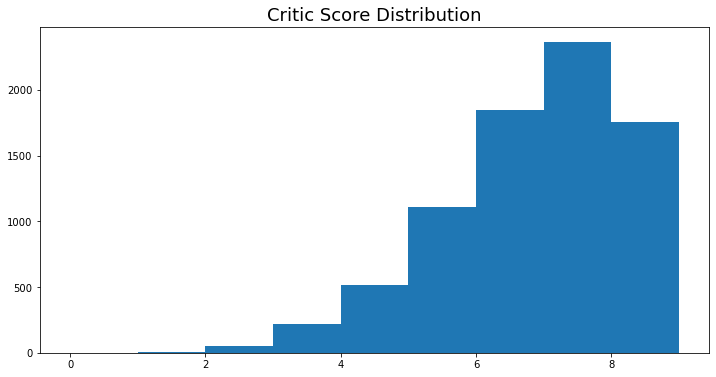

In [36]:
# Plot cirtic_score
plt.figure(figsize=(12,6))
plt.title('Critic Score Distribution', fontsize = 18)
bins = np.arange(0,df_sales.Critic_Score.max())
plt.hist(data=df_sales, x='Critic_Score', bins = bins);

### Score Distribution over Games

7.5 is the highest scored for games by critics. This graph helps to understand the distribution of score among the games in the dataset.  

In [37]:
mod_df = df_sales.dropna()
mod_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.9,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,5.8,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,4.6,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,8.1,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,8.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,6.1,12.0,5.8,43.0,Atomic Games,T


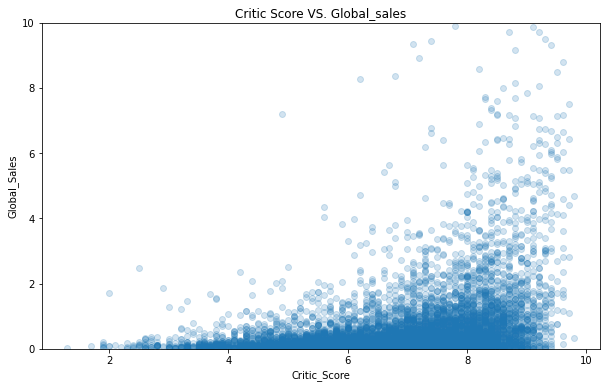

In [38]:
plt.figure(figsize=(10,6))
sb.regplot(fit_reg=False, data=df_sales, x='Critic_Score', y='Global_Sales', scatter_kws={'alpha':1/5});
plt.ylim(0,10)
plt.title('Critic Score VS. Global_sales');

### Critic Score Vs. Global Sales

The critic score is directly relevant to the sales. It is evidently observed here. 

In [39]:
import statsmodels.formula.api as smf

model=smf.ols(formula='Critic_Score~Global_Sales',data=df_sales)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Critic_Score   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     521.6
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          5.92e-112
Time:                        15:39:25   Log-Likelihood:                -13994.
No. Observations:                8137   AIC:                         2.799e+04
Df Residuals:                    8135   BIC:                         2.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7670      0.016    422.380   

### OLS Regression

Here, from summary table we can see that t-statistic for critic score is 422.380 and for global sales it is 22.839. 
R squared is at 0.060 ad P>t is 0.000 which proves that the dataset and analysis are pretty concrete. 




In [40]:
import statsmodels.formula.api as smf

model=smf.ols(formula='NA_Sales~Global_Sales',data=df_sales)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.293e+05
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:39:25   Log-Likelihood:                -2155.5
No. Observations:               16719   AIC:                             4315.
Df Residuals:                   16717   BIC:                             4330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0005      0.002     -0.236   

### OLS Regression - NA Sales vs. Gloal Sales

The R squared value is a slightly higher than the previous analyses, however it still proves the regression holds good with the relation. 

## Conclusion

The dataset is pretty good as per the observations and inferences

The analysis helps businesses to understand the global market and its dependencies across various factors. 

Decision making is made easier with these references. 

### Limitations
Few trends are unable to understand. Provided with more relevant data and time, with real business news comparison the data can be more powerful which will remain as a valuable resouce to all players in the industry. 

